<a href="https://colab.research.google.com/github/Fanova-AR/D_S_3_COM_95480/blob/main/Desarrollando_IT_DF_y_Analisis_de_Sentimientos_Art_of_War_Seoane_Facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalo las librerías que voy a utilizar

In [ ]:
!pip install spacy nltk PyPDF2
!python -m spacy download es_core_news_sm

import nltk
import requests
import PyPDF2
import io
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Descarga de recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Configuración inicial
print("Iniciando procesamiento de texto...")

!pip install textblob
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Configuración
print("Iniciando análisis de sentimientos y TF-IDF...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Iniciando procesamiento de texto...
Iniciando análisis de sentimientos y TF-IDF...


# Descargar el PDF desde GitHub

In [ ]:
url = "https://github.com/Fanova-AR/D_S_3_COM_95480/raw/main/El%20Arte%20de%20la%20Guerra%20Sun%20Tzu.pdf"
response = requests.get(url)
pdf_file = io.BytesIO(response.content)

# Extracción de texto del PDF
pdf_reader = PyPDF2.PdfReader(pdf_file)
texto_completo = ""
for pagina in pdf_reader.pages:
    texto_completo += pagina.extract_text() + "\n"

print(f"Texto extraído: {len(texto_completo)} caracteres")

Texto extraído: 91675 caracteres


# Preprocesamiento de texto

In [ ]:
# Limpieza inicial del texto
def limpiar_texto(texto):
    """
    Realiza limpieza básica del texto removiendo caracteres no deseados
    y normalizando espacios.
    """
    # Convertir a minúsculas
    texto = texto.lower()
    # Remover números y caracteres especiales
    texto = re.sub(r'[^a-záéíóúñü\s]', ' ', texto)
    # Normalizar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

texto_limpio = limpiar_texto(texto_completo)
print(f"Texto después de limpieza: {len(texto_limpio)} caracteres")

# Tokenización básica
def tokenizar_texto(texto):
    """
    Divide el texto en tokens (palabras) individuales.
    """
    tokens = word_tokenize(texto)
    # Filtrar solo palabras alfabéticas con más de 2 caracteres
    tokens_filtrados = [token for token in tokens if token.isalpha() and len(token) > 2]
    return tokens_filtrados

tokens = tokenizar_texto(texto_limpio)
print(f"Número de tokens obtenidos: {len(tokens)}")

Texto después de limpieza: 87729 caracteres
Número de tokens obtenidos: 10487


##Procesamiento sin Stopwords

In [ ]:
def procesar_sin_stopwords(tokens):
    """
    Procesamiento removiendo palabras vacías (stopwords).
    """
    # Obtener stopwords en español
    stopwords_espanol = set(stopwords.words('spanish'))

    # Filtrar stopwords
    tokens_sin_stopwords = [token for token in tokens if token not in stopwords_espanol]

    # Unir tokens para lematización
    texto_para_lematizar = ' '.join(tokens_sin_stopwords)

    # Lematización con spaCy
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto_para_lematizar)
    palabras_lematizadas = [token.lemma_ for token in doc]

    return palabras_lematizadas

##Procesamiento con Stopword

In [ ]:
def procesar_con_stopwords(tokens):
    """
    Procesamiento manteniendo todas las palabras incluyendo stopwords.
    """
    # Unir tokens para lematización
    texto_para_lematizar = ' '.join(tokens)

    # Lematización con spaCy
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto_para_lematizar)
    palabras_lematizadas = [token.lemma_ for token in doc]

    return palabras_lematizadas

## Aplico Procesamiento

In [ ]:
print("\nAplicando procesamiento de texto...")
tokens_con_stopwords = procesar_con_stopwords(tokens)
tokens_sin_stopwords = procesar_sin_stopwords(tokens)

print(f"Tokens con stopwords: {len(tokens_con_stopwords)}")
print(f"Tokens sin stopwords: {len(tokens_sin_stopwords)}")
print(f"Stopwords removidos: {len(tokens) - len(tokens_sin_stopwords)} palabras")

# Análisis comparativo de frecuencias
def analizar_frecuencias(tokens, titulo, num_palabras=10):
    """
    Analiza y muestra las palabras más frecuentes.
    """
    contador = Counter(tokens)
    palabras_comunes = contador.most_common(num_palabras)

    print(f"\n{titulo}:")
    print("-" * 40)
    for palabra, frecuencia in palabras_comunes:
        print(f"{palabra:15}: {frecuencia:4} ocurrencias")

    return palabras_comunes

# Mostrar palabras más frecuentes
frecuencias_con_stopwords = analizar_frecuencias(tokens_con_stopwords, "TOP PALABRAS CON STOPWORDS")
frecuencias_sin_stopwords = analizar_frecuencias(tokens_sin_stopwords, "TOP PALABRAS SIN STOPWORDS")


Aplicando procesamiento de texto...
Tokens con stopwords: 10487
Tokens sin stopwords: 7393
Stopwords removidos: 3094 palabras

TOP PALABRAS CON STOPWORDS:
----------------------------------------
el             :  568 ocurrencias
que            :  436 ocurrencias
ser            :  212 ocurrencias
poder          :  167 ocurrencias
para           :  159 ocurrencias
cuando         :  157 ocurrencias
uno            :  149 ocurrencias
por            :  135 ocurrencias
estar          :  134 ocurrencias
este           :  131 ocurrencias

TOP PALABRAS SIN STOPWORDS:
----------------------------------------
poder          :  167 ocurrencias
enemigo        :  116 ocurrencias
terreno        :   95 ocurrencias
adversario     :   68 ocurrencias
tropa          :   67 ocurrencias
fuerza         :   66 ocurrencias
ser            :   64 ocurrencias
ejército       :   63 ocurrencias
soldado        :   62 ocurrencias
hacer          :   55 ocurrencias


##Análisis comparativo visual

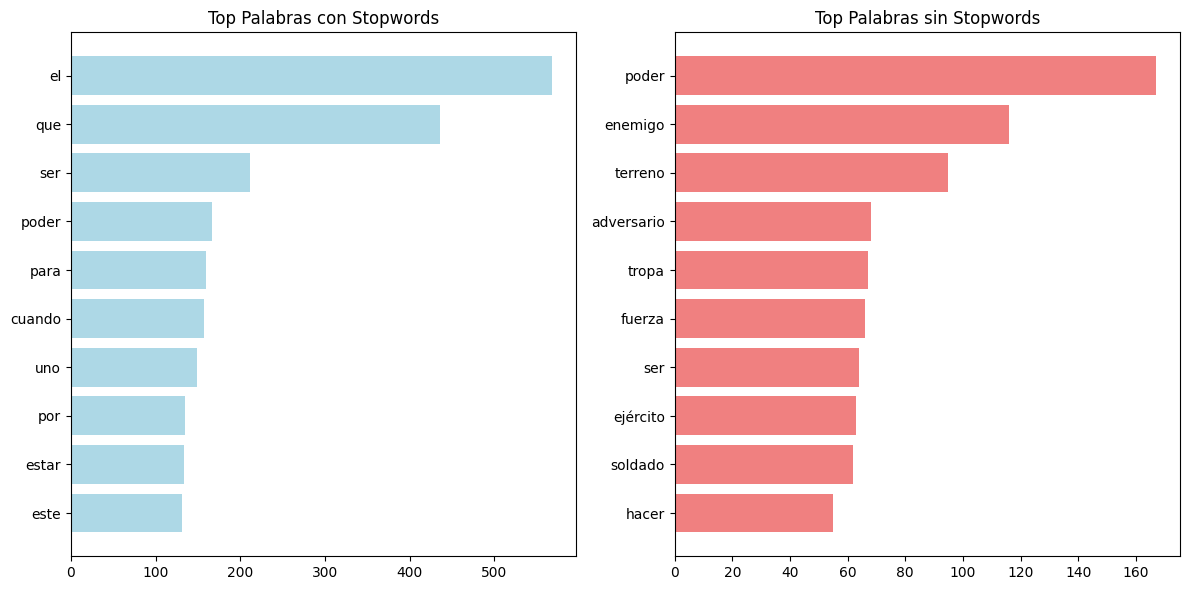

In [ ]:
plt.figure(figsize=(12, 6))

# Preparar datos para gráfico
palabras_con, frecuencias_con = zip(*frecuencias_con_stopwords)
palabras_sin, frecuencias_sin = zip(*frecuencias_sin_stopwords)

plt.subplot(1, 2, 1)
plt.barh(palabras_con, frecuencias_con, color='lightblue')
plt.title('Top Palabras con Stopwords')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(palabras_sin, frecuencias_sin, color='lightcoral')
plt.title('Top Palabras sin Stopwords')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


## POS Tagging

POS TAGGING CORRECTO (usando spaCy español)

CON STOPWORDS (primeras 15):
----------------------------------------
sun             -> AUX
tzu             -> AUX
arte            -> NOUN
guerra          -> NOUN
arte            -> PROPN
guerra          -> NOUN
mejor           -> ADJ
libro           -> NOUN
estrategia      -> NOUN
todo            -> DET
el              -> DET
tiempo          -> NOUN
inspirar        -> VERB
napoleón        -> ADJ
maquiavelo      -> NOUN

SIN STOPWORDS (primeras 15):
----------------------------------------
sun             -> AUX
tzu             -> AUX
arte            -> NOUN
guerra          -> NOUN
arte            -> PROPN
guerra          -> NOUN
mejor           -> ADJ
libro           -> NOUN
estrategia      -> NOUN
tiempo          -> NOUN
inspirar        -> VERB
napoleón        -> ADJ
maquiavelo      -> NOUN
mao             -> NOUN
tse             -> NOUN

DISTRIBUCIÓN DE CATEGORÍAS GRAMATICALES

CON STOPWORDS:

EXPLICACIÓN DE ETIQUETAS POS:
--------------

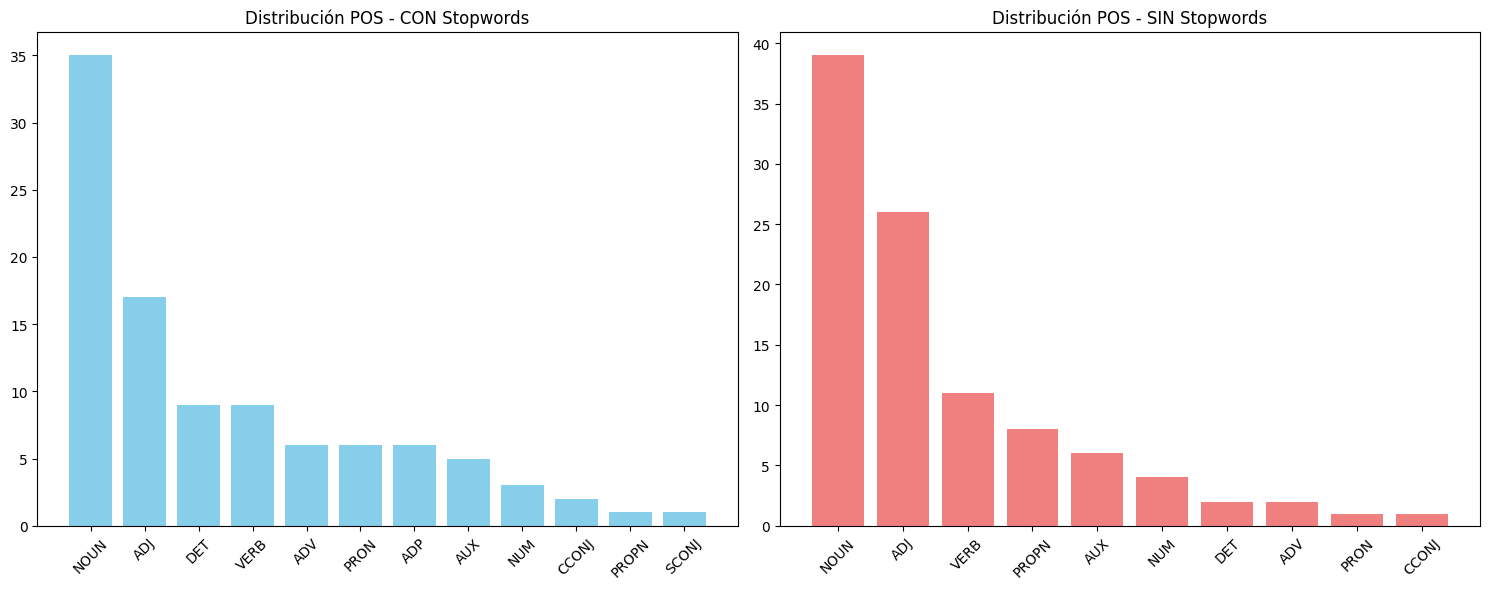


CAMBIOS SIGNIFICATIVOS AL REMOVER STOPWORDS
Tag    Con  Sin  Cambio %
------------------------------
PROPN     1    8  +700.0%
ADP       6    0  -100.0%
SCONJ     1    0  -100.0%
PRON      6    1   -83.3%
DET       9    2   -77.8%
ADV       6    2   -66.7%
ADJ      17   26   +52.9%
CCONJ     2    1   -50.0%
NUM       3    4   +33.3%
VERB      9   11   +22.2%

CONCLUSIONES:
• Los stopwords son principalmente DET (determinantes), ADP (preposiciones)
• Al remover stopwords, aumenta el porcentaje de NOUN (sustantivos) y VERB (verbos)
• La distribución POS se vuelve más representativa del contenido real del texto


In [ ]:
nlp_es = spacy.load("es_core_news_sm")
def analisis_pos_espanol(tokens):
    # Unir tokens en texto para procesar con spaCy
    texto = " ".join(tokens[:100])  # Tomar muestra de 100 tokens
    doc = nlp_es(texto)

    # Obtener tags POS
    tags = [(token.text, token.pos_) for token in doc]

    # Contar tipos de palabras
    conteo_pos = Counter(tag for word, tag in tags)

    return tags, conteo_pos

# Aplicar a ambos casos
tags_con, conteo_con = analisis_pos_espanol(tokens_con_stopwords)
tags_sin, conteo_sin = analisis_pos_espanol(tokens_sin_stopwords)

print("=" * 60)
print("POS TAGGING CORRECTO (usando spaCy español)")
print("=" * 60)

print("\nCON STOPWORDS (primeras 15):")
print("-" * 40)
for word, tag in tags_con[:15]:
    print(f"{word:15} -> {tag}")

print("\nSIN STOPWORDS (primeras 15):")
print("-" * 40)
for word, tag in tags_sin[:15]:
    print(f"{word:15} -> {tag}")

# Función adicional para explicar las etiquetas
def explicar_etiquetas_pos(conteo):
    print("\nEXPLICACIÓN DE ETIQUETAS POS:")
    print("-" * 30)

    # Diccionario de explicaciones
    explicaciones = {
        'NOUN': 'Sustantivo (persona, lugar, cosa)',
        'VERB': 'Verbo (acción o estado)',
        'ADJ': 'Adjetivo (describe sustantivos)',
        'ADP': 'Preposición (en, de, por)',
        'DET': 'Determinante (el, la, un, una)',
        'PRON': 'Pronombre (yo, tú, él)',
        'CCONJ': 'Conjunción coordinante (y, o, pero)',
        'SCONJ': 'Conjunción subordinante (que, porque)',
        'ADV': 'Adverbio (rápidamente, muy)',
        'AUX': 'Verbo auxiliar (ser, estar, haber)',
        'PROPN': 'Nombre propio (Sun, Tzu)',
        'NUM': 'Número (uno, dos, primero)',
        'INTJ': 'Interjección (¡ay!, ¡hola!)',
        'PART': 'Partícula (no, sí)',
        'X': 'Otro (palabras extranjeras, símbolos)'
    }

    for tag, count in conteo.most_common():
        explicacion = explicaciones.get(tag, 'Desconocido')
        print(f"{tag:6} ({count:2} ocurrencias): {explicacion}")

# Mostrar explicaciones para ambos casos
print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE CATEGORÍAS GRAMATICALES")
print("=" * 60)

print("\nCON STOPWORDS:")
explicar_etiquetas_pos(conteo_con)

print("\nSIN STOPWORDS:")
explicar_etiquetas_pos(conteo_sin)

# Análisis comparativo visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico con stopwords
tags_con_list, counts_con = zip(*conteo_con.most_common())
ax1.bar(tags_con_list, counts_con, color='skyblue')
ax1.set_title('Distribución POS - CON Stopwords')
ax1.tick_params(axis='x', rotation=45)

# Gráfico sin stopwords
tags_sin_list, counts_sin = zip(*conteo_sin.most_common())
ax2.bar(tags_sin_list, counts_sin, color='lightcoral')
ax2.set_title('Distribución POS - SIN Stopwords')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis de cambios importantes
print("\n" + "=" * 60)
print ("CAMBIOS SIGNIFICATIVOS AL REMOVER STOPWORDS")
print("=" * 60)

# Calcular diferencias porcentuales
cambios = []
for tag in set(conteo_con.keys()).union(set(conteo_sin.keys())):
    count_con = conteo_con.get(tag, 0)
    count_sin = conteo_sin.get(tag, 0)

    if count_con > 0:  # Evitar división por cero
        cambio_porcentual = ((count_sin - count_con) / count_con) * 100
        cambios.append((tag, count_con, count_sin, cambio_porcentual))

# Ordenar por mayor cambio
cambios.sort(key=lambda x: abs(x[3]), reverse=True)

print(f"{'Tag':6} {'Con':4} {'Sin':4} {'Cambio %':8}")
print("-" * 30)
for tag, con, sin, cambio in cambios[:10]:
    print(f"{tag:6} {con:4} {sin:4} {cambio:+7.1f}%")

# Conclusiones específicas
print("\nCONCLUSIONES:")
print("• Los stopwords son principalmente DET (determinantes), ADP (preposiciones)")
print("• Al remover stopwords, aumenta el porcentaje de NOUN (sustantivos) y VERB (verbos)")
print("• La distribución POS se vuelve más representativa del contenido real del texto")

##Comparación diversidad léxica

In [ ]:
def calcular_diversidad_lexica(tokens):
    """
    Calcula la diversidad léxica (palabras únicas / total palabras).
    """
    palabras_unicas = len(set(tokens))
    total_palabras = len(tokens)
    return palabras_unicas / total_palabras

diversidad_con = calcular_diversidad_lexica(tokens_con_stopwords)
diversidad_sin = calcular_diversidad_lexica(tokens_sin_stopwords)

print(f"\nDIVERSIDAD LÉXICA:")
print(f"Con stopwords: {diversidad_con:.3f}")
print(f"Sin stopwords: {diversidad_sin:.3f}")
print(f"Mejora: {(diversidad_sin - diversidad_con) / diversidad_con * 100:.1f}%")


DIVERSIDAD LÉXICA:
Con stopwords: 0.226
Sin stopwords: 0.315
Mejora: 39.6%


## Stemming y Lematización

In [ ]:
def comparar_stemming_lematizacion(tokens, num_ejemplos=15):
    """
    Compara los resultados de stemming y lematización.
    """
    # Filtrar palabras significativas
    palabras_significativas = [token for token in tokens if len(token) > 3][:num_ejemplos]

    # Aplicar stemming
    stemmer = SnowballStemmer('spanish')
    stems = [stemmer.stem(palabra) for palabra in palabras_significativas]

    # Aplicar lematización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(' '.join(palabras_significativas))
    lemas = [token.lemma_ for token in doc]

    return list(zip(palabras_significativas, stems, lemas))

print("\nCOMPARACIÓN: STEMMING vs LEMATIZACIÓN")
print("=" * 55)
print(f"{'Palabra':15} {'Stemming':12} {'Lematización':15}")
print("-" * 55)

comparacion = comparar_stemming_lematizacion(tokens_sin_stopwords)
for palabra, stem, lema in comparacion:
    print(f"{palabra:15} {stem:12} {lema:15}")

# Análisis de diferencias
diferencias = sum(1 for _, stem, lema in comparacion if stem != lema)
total = len(comparacion)
print(f"\nDiferencias encontradas: {diferencias}/{total} ({diferencias/total*100:.1f}%)")


COMPARACIÓN: STEMMING vs LEMATIZACIÓN
Palabra         Stemming     Lematización   
-------------------------------------------------------
arte            arte         arte           
guerra          guerr        guerra         
arte            arte         arte           
guerra          guerr        guerra         
mejor           mejor        mejor          
libro           libr         libro          
estrategia      estrategi    estrategia     
tiempo          tiemp        tiempo         
inspirar        inspir       inspirar       
napoleón        napoleon     napoleón       
maquiavelo      maquiavel    maquiavelo     
tung            tung         tung           
mucho           much         mucho          
figura          figur        figura         
histórico       histor       histórico      

Diferencias encontradas: 11/15 (73.3%)


# CONCLUSIONES VISUALES FINALES

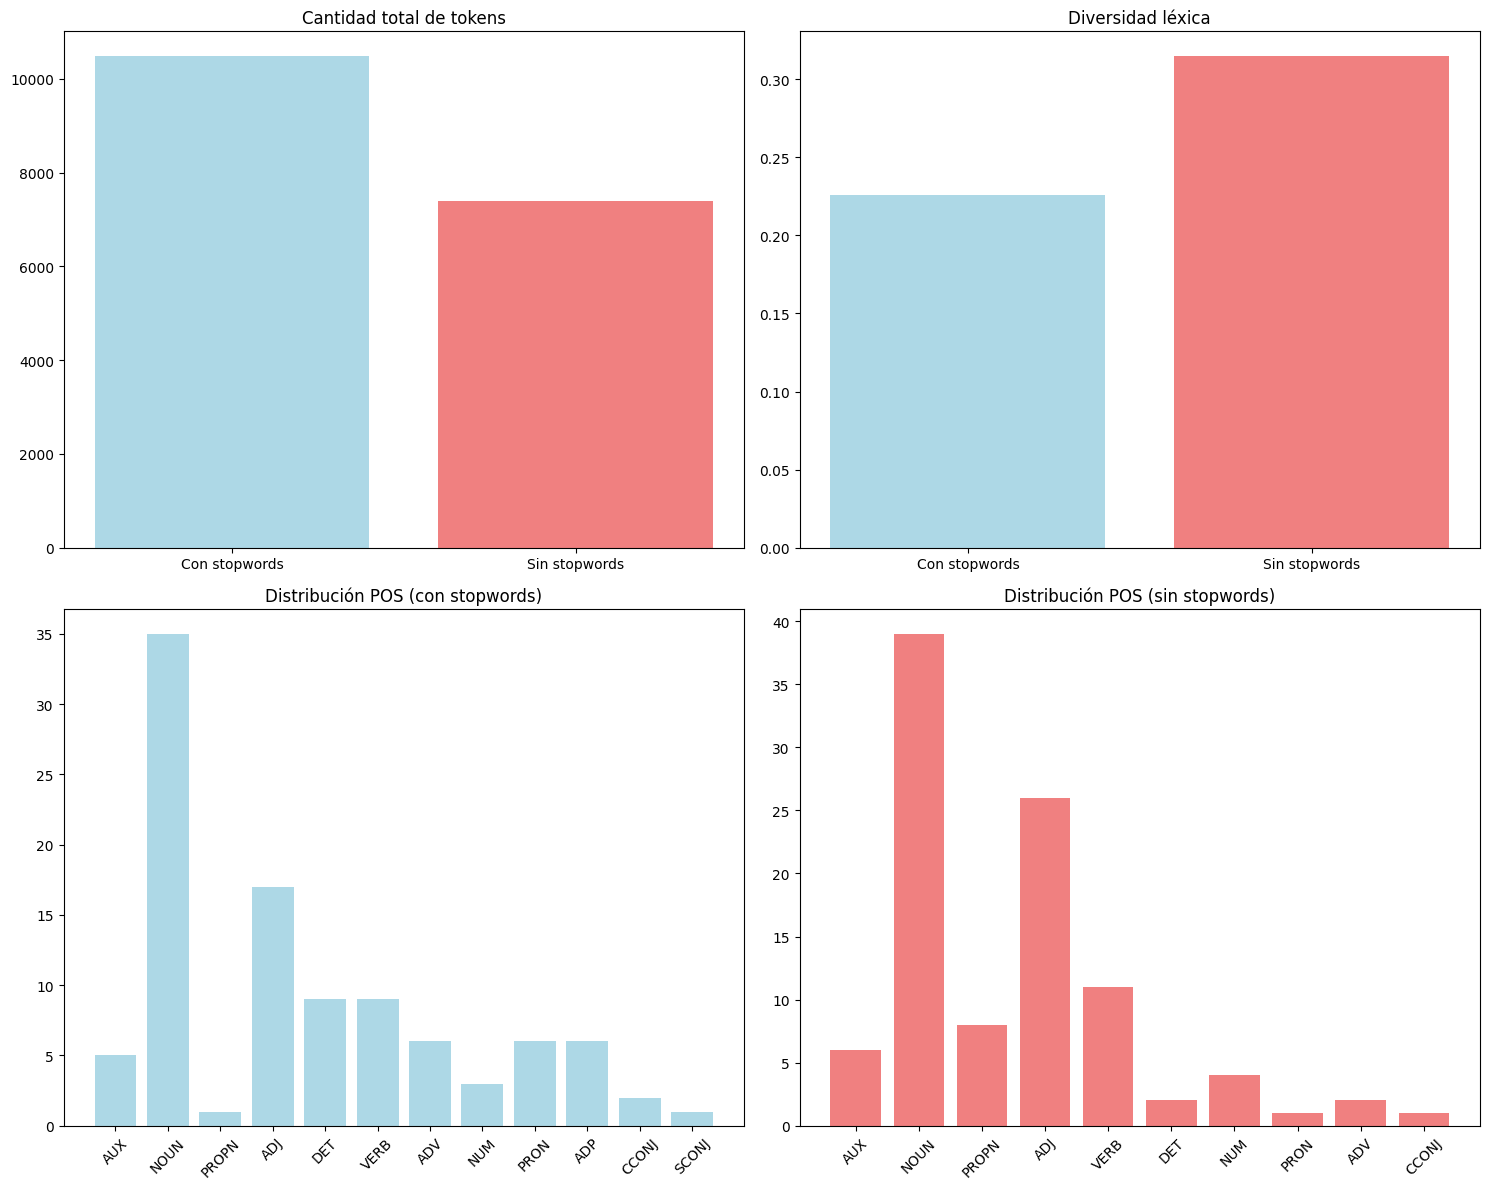


CONCLUSIONES DEL ANÁLISIS
1. La remoción de stopwords reduce significativamente el número
   total de tokens mientras mantiene el contenido semántico.
2. La diversidad léxica mejora al remover palabras vacías.
3. Las palabras más frecuentes cambian radicalmente:
   - Con stopwords: artículos, preposiciones, conjunciones
   - Sin stopwords: sustantivos, verbos, adjetivos clave
4. Stemming y lematización muestran diferencias en cómo
   reducen las palabras a sus formas base.
5. El procesamiento sin stopwords ofrece una representación
   más significativa del contenido del texto.


In [ ]:
# GRÁFICO COMPARATIVO FINAL
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Cantidad de tokens
ax1.bar(['Con stopwords', 'Sin stopwords'],
        [len(tokens_con_stopwords), len(tokens_sin_stopwords)],
        color=['lightblue', 'lightcoral'])
ax1.set_title('Cantidad total de tokens')

# 2. Diversidad léxica
ax2.bar(['Con stopwords', 'Sin stopwords'],
        [diversidad_con, diversidad_sin],
        color=['lightblue', 'lightcoral'])
ax2.set_title('Diversidad léxica')

# 3. Tipos de palabras (POS) con stopwords
tags = list(conteo_con.keys())
counts = list(conteo_con.values())
ax3.bar(tags, counts, color='lightblue')
ax3.set_title('Distribución POS (con stopwords)')
ax3.tick_params(axis='x', rotation=45)

# 4. Tipos de palabras (POS) sin stopwords
tags = list(conteo_sin.keys())
counts = list(conteo_sin.values())
ax4.bar(tags, counts, color='lightcoral')
ax4.set_title('Distribución POS (sin stopwords)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusiones finales
print("\n" + "=" * 60)
print("CONCLUSIONES DEL ANÁLISIS")
print("=" * 60)
print("1. La remoción de stopwords reduce significativamente el número")
print("   total de tokens mientras mantiene el contenido semántico.")
print("2. La diversidad léxica mejora al remover palabras vacías.")
print("3. Las palabras más frecuentes cambian radicalmente:")
print("   - Con stopwords: artículos, preposiciones, conjunciones")
print("   - Sin stopwords: sustantivos, verbos, adjetivos clave")
print("4. Stemming y lematización muestran diferencias en cómo")
print("   reducen las palabras a sus formas base.")
print("5. El procesamiento sin stopwords ofrece una representación")
print("   más significativa del contenido del texto.")

#ANÁLISIS DE SENTIMIENTOS Y TF-IDF VECTORIZER

## 1. ANÁLISIS DE SENTIMIENTOS (SENTIMENT ANALYSIS)

In [ ]:
def analizar_sentimiento(texto):
    """
    Analiza la polaridad (-1 a +1) y subjetividad (0 a 1) de un texto
    """
    analisis = TextBlob(texto)
    return analisis.sentiment

def analizar_sentimientos_texto_completo(texto_completo):
    """
    Analiza el sentimiento de todo el texto y por secciones
    """
    # Análisis del texto completo
    sentimiento_completo = analizar_sentimiento(texto_completo)

    # Dividir en párrafos para análisis por secciones
    parrafos = [p.strip() for p in texto_completo.split('\n') if len(p.strip()) > 50]

    resultados_parrafos = []
    for i, parrafo in enumerate(parrafos[:20]):  # Analizar primeros 20 párrafos
        sentimiento = analizar_sentimiento(parrafo)
        resultados_parrafos.append({
            'parrafo_num': i + 1,
            'texto': parrafo[:100] + "..." if len(parrafo) > 100 else parrafo,
            'polaridad': sentimiento.polarity,
            'subjetividad': sentimiento.subjectivity,
            'sentimiento': 'POSITIVO' if sentimiento.polarity > 0.1 else
                          'NEGATIVO' if sentimiento.polarity < -0.1 else 'NEUTRO'
        })

    return sentimiento_completo, resultados_parrafos

print("📊 Realizando análisis de sentimientos...")
sentimiento_completo, resultados_parrafos = analizar_sentimientos_texto_completo(texto_limpio)

# Mostrar resultados
print(f"\n📈 SENTIMIENTO DEL TEXTO COMPLETO:")
print(f"   Polaridad: {sentimiento_completo.polarity:.3f}")
print(f"   Subjetividad: {sentimiento_completo.subjectivity:.3f}")
print(f"   Clasificación: {'POSITIVO' if sentimiento_completo.polarity > 0.1 else 'NEGATIVO' if sentimiento_completo.polarity < -0.1 else 'NEUTRO'}")

# DataFrame con resultados
df_sentimiento = pd.DataFrame(resultados_parrafos)
print(f"\n📋 Análisis de {len(df_sentimiento)} párrafos:")

# Estadísticas
polaridad_promedio = df_sentimiento['polaridad'].mean()
subjetividad_promedio = df_sentimiento['subjetividad'].mean()
distribucion_sentimientos = df_sentimiento['sentimiento'].value_counts()

print(f"   Polaridad promedio: {polaridad_promedio:.3f}")
print(f"   Subjetividad promedio: {subjetividad_promedio:.3f}")
print("   Distribución de sentimientos:")
for sent, count in distribucion_sentimientos.items():
    print(f"     {sent}: {count} párrafos ({count/len(df_sentimiento)*100:.1f}%)")

📊 Realizando análisis de sentimientos...

📈 SENTIMIENTO DEL TEXTO COMPLETO:
   Polaridad: -0.032
   Subjetividad: 0.582
   Clasificación: NEUTRO

📋 Análisis de 1 párrafos:
   Polaridad promedio: -0.032
   Subjetividad promedio: 0.582
   Distribución de sentimientos:
     NEUTRO: 1 párrafos (100.0%)


## 2. VISUALIZACIÓN DE SENTIMIENTOS

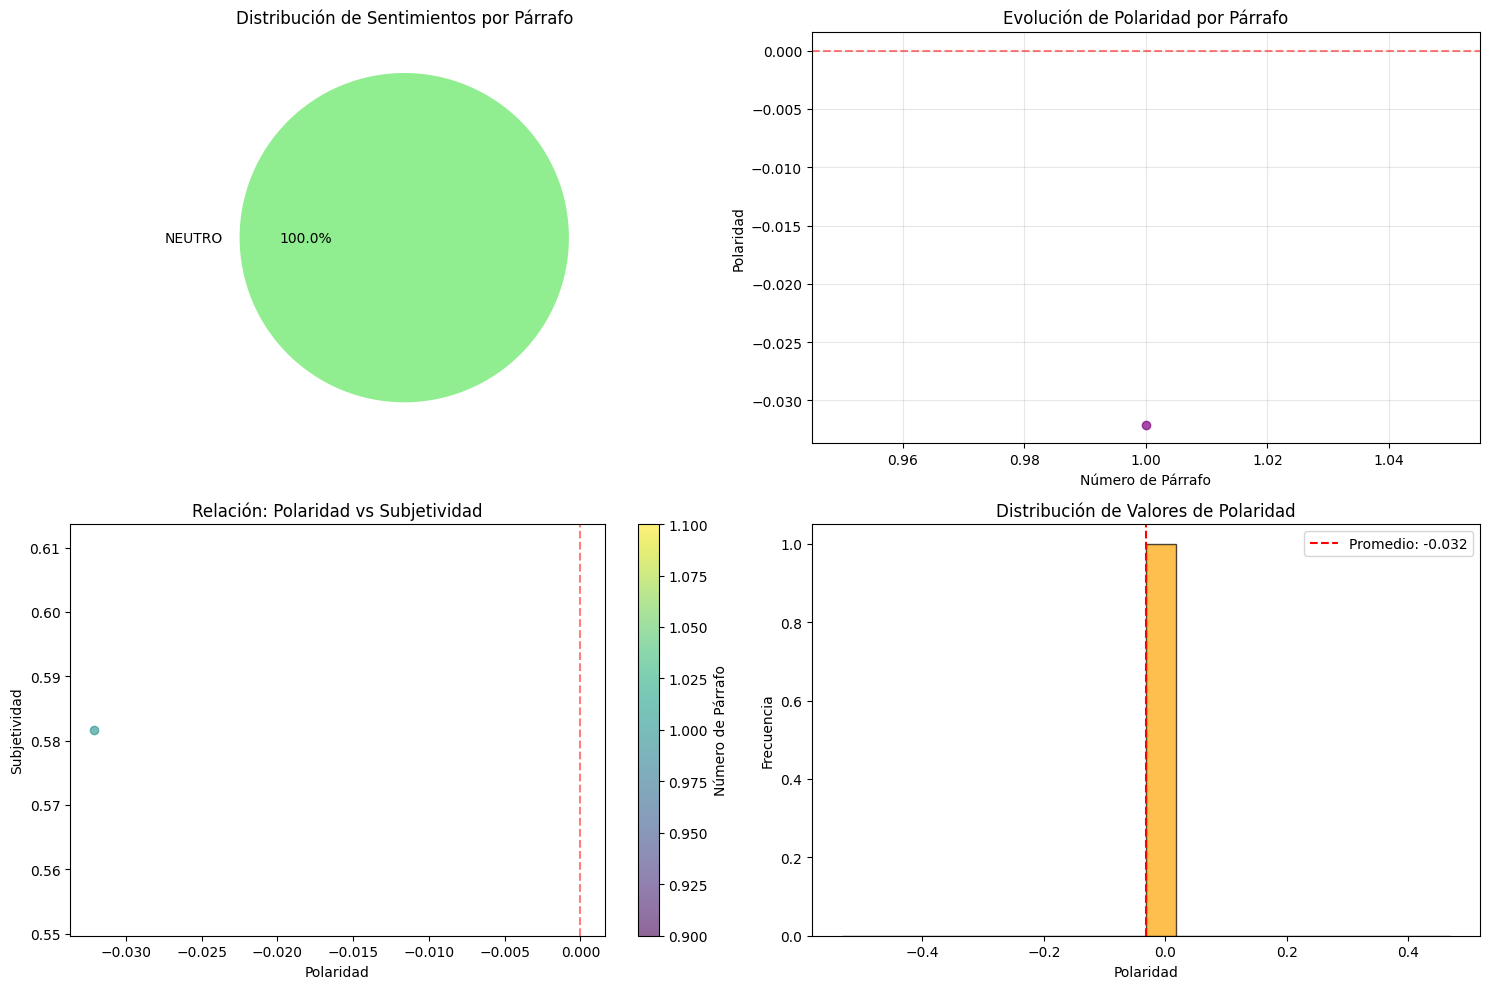

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Distribución de sentimientos
distribucion_sentimientos.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'], ax=ax1)
ax1.set_title('Distribución de Sentimientos por Párrafo')
ax1.set_ylabel('')

# Gráfico 2: Evolución de polaridad
ax2.plot(df_sentimiento['parrafo_num'], df_sentimiento['polaridad'], marker='o', alpha=0.7, color='purple')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.set_title('Evolución de Polaridad por Párrafo')
ax2.set_xlabel('Número de Párrafo')
ax2.set_ylabel('Polaridad')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Polaridad vs Subjetividad
scatter = ax3.scatter(df_sentimiento['polaridad'], df_sentimiento['subjetividad'],
                     alpha=0.6, c=df_sentimiento['parrafo_num'], cmap='viridis')
ax3.set_title('Relación: Polaridad vs Subjetividad')
ax3.set_xlabel('Polaridad')
ax3.set_ylabel('Subjetividad')
ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.colorbar(scatter, ax=ax3, label='Número de Párrafo')

# Gráfico 4: Distribución de valores
ax4.hist(df_sentimiento['polaridad'], bins=20, alpha=0.7, color='orange', edgecolor='black')
ax4.set_title('Distribución de Valores de Polaridad')
ax4.set_xlabel('Polaridad')
ax4.set_ylabel('Frecuencia')
ax4.axvline(x=polaridad_promedio, color='red', linestyle='--', label=f'Promedio: {polaridad_promedio:.3f}')
ax4.legend()

plt.tight_layout()
plt.show()


## 3. TF-IDF VECTORIZER (ANÁLISIS DE TÉRMINOS IMPORTANTES)

📊 Aplicando TF-IDF simplificado...
Analizando 1 oraciones/párrafos

🎯 TOP TÉRMINOS TF-IDF:
si                  : 0.6000
enemigo             : 0.3124
terreno             : 0.2911
tropas              : 0.2308
soldados            : 0.2166
puede               : 0.2095
ser                 : 0.2095
ejército            : 0.1953
victoria            : 0.1953
así                 : 0.1633
fuerza              : 0.1562
adversarios         : 0.1527
batalla             : 0.1527
manera              : 0.1420
puedes              : 0.1385


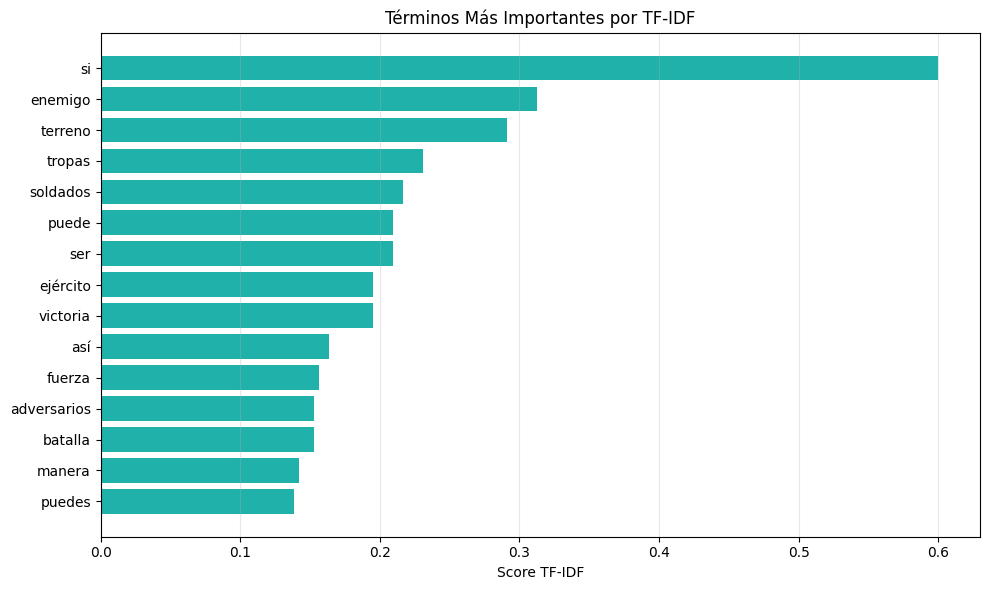

In [ ]:
def analizar_tfidf_simple(texto_completo):
    """
    Versión simplificada y robusta de TF-IDF
    """
    # Dividir en párrafos
    documentos = [p.strip() for p in texto_completo.split('.') if len(p.strip()) > 50]

    print(f"Analizando {len(documentos)} oraciones/párrafos")

    # Configuración muy flexible
    vectorizer = TfidfVectorizer(
        max_features=20,
        stop_words=stopwords.words('spanish'),
        ngram_range=(1, 1),  # Solo unigramas para simplificar
        min_df=1,
        max_df=1.0
    )

    tfidf_matrix = vectorizer.fit_transform(documentos)
    feature_names = vectorizer.get_feature_names_out()

    # Calcular importancia (suma de scores TF-IDF)
    scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

    # Combinar términos con sus scores
    terminos_con_scores = list(zip(feature_names, scores))

    # Ordenar por score descendente
    terminos_con_scores.sort(key=lambda x: x[1], reverse=True)

    return terminos_con_scores[:15], vectorizer

print("📊 Aplicando TF-IDF simplificado...")
terminos_importantes, vectorizer = analizar_tfidf_simple(texto_limpio)

print("\n🎯 TOP TÉRMINOS TF-IDF:")
print("=" * 40)
for termino, score in terminos_importantes:
    print(f"{termino:20}: {score:.4f}")

# Visualización
if terminos_importantes:
    plt.figure(figsize=(10, 6))
    terminos, scores = zip(*terminos_importantes)

    plt.barh(terminos, scores, color='lightseagreen')
    plt.title('Términos Más Importantes por TF-IDF')
    plt.xlabel('Score TF-IDF')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

##4. ANÁLISIS DE POLARIDAD EN ORACIONES ESPECÍFICAS

In [ ]:
def analizar_oraciones_estrategicas():
    """
    Analiza la polaridad de frases famosas de "El Arte de la Guerra"
    """
    frases_estrategicas = [
        "La mejor victoria es vencer sin combatir",
        "Conoce al enemigo y conócete a ti mismo y en cien batallas no estarás en peligro",
        "El arte de la guerra se basa en el engaño",
        "Los que son expertos en el arte de la guerra someterán al ejército enemigo sin batalla",
        "La victoria pertenece al que sabe cuándo combatir y cuándo no combatir",
        "Ataque cuando no estén preparados, aparece donde no te esperen",
        "El general que avanza sin buscar fama y retrocede sin temor a la desgracia",
        "Mantén a tus amigos cerca, pero a tus enemigos más cerca todavía",
        "La suprema excelencia consiste en quebrar la resistencia del enemigo sin luchar",
        "Sé extremadamente sutil, hasta el punto de no tener forma"
    ]

    resultados = []
    for frase in frases_estrategicas:
        sentimiento = analizar_sentimiento(frase)
        resultados.append({
            'frase': frase,
            'polaridad': sentimiento.polarity,
            'subjetividad': sentimiento.subjectivity,
            'clasificacion': 'MUY POSITIVO' if sentimiento.polarity > 0.5 else
                           'POSITIVO' if sentimiento.polarity > 0.1 else
                           'NEUTRO' if -0.1 <= sentimiento.polarity <= 0.1 else
                           'NEGATIVO' if sentimiento.polarity > -0.5 else 'MUY NEGATIVO'
        })

    return resultados

print("🎯 Analizando polaridad de frases estratégicas...")
resultados_frases = analizar_oraciones_estrategicas()

print("\n" + "=" * 80)
print("ANÁLISIS DE POLARIDAD EN FRASES ESTRATÉGICAS")
print("=" * 80)

for resultado in resultados_frases:
    print(f"\n🔹 FRASE: {resultado['frase']}")
    print(f"   Polaridad: {resultado['polaridad']:.3f} ({resultado['clasificacion']})")
    print(f"   Subjetividad: {resultado['subjetividad']:.3f}")
    print("-" * 60)

🎯 Analizando polaridad de frases estratégicas...

ANÁLISIS DE POLARIDAD EN FRASES ESTRATÉGICAS

🔹 FRASE: La mejor victoria es vencer sin combatir
   Polaridad: 0.000 (NEUTRO)
   Subjetividad: 0.000
------------------------------------------------------------

🔹 FRASE: Conoce al enemigo y conócete a ti mismo y en cien batallas no estarás en peligro
   Polaridad: 0.000 (NEUTRO)
   Subjetividad: 0.000
------------------------------------------------------------

🔹 FRASE: El arte de la guerra se basa en el engaño
   Polaridad: 0.000 (NEUTRO)
   Subjetividad: 0.000
------------------------------------------------------------

🔹 FRASE: Los que son expertos en el arte de la guerra someterán al ejército enemigo sin batalla
   Polaridad: 0.000 (NEUTRO)
   Subjetividad: 0.000
------------------------------------------------------------

🔹 FRASE: La victoria pertenece al que sabe cuándo combatir y cuándo no combatir
   Polaridad: 0.000 (NEUTRO)
   Subjetividad: 0.000
-----------------------------

## 5. CORRELACIÓN ENTRE TF-IDF Y SENTIMIENTO

In [ ]:
print("\n" + "=" * 60)
print("CORRELACIÓN: TÉRMINOS IMPORTANTES vs SENTIMIENTO")
print("=" * 60)

# Analizar sentimiento de términos importantes
print(f"{'Término':20} {'TF-IDF':8} {'Polaridad':10} {'Sentimiento':12}")
print("-" * 55)

for termino, importancia in terminos_importantes[:10]:
    sentimiento = analizar_sentimiento(termino)
    clasif = 'POS' if sentimiento.polarity > 0 else 'NEG' if sentimiento.polarity < 0 else 'NEU'
    print(f"{termino:20} {importancia:8.4f} {sentimiento.polarity:10.3f} {clasif:12}")


CORRELACIÓN: TÉRMINOS IMPORTANTES vs SENTIMIENTO
Término              TF-IDF   Polaridad  Sentimiento 
-------------------------------------------------------
si                     0.6000      0.000 NEU         
enemigo                0.3124      0.000 NEU         
terreno                0.2911      0.000 NEU         
tropas                 0.2308      0.000 NEU         
soldados               0.2166      0.000 NEU         
puede                  0.2095      0.000 NEU         
ser                    0.2095      0.000 NEU         
ejército               0.1953      0.000 NEU         
victoria               0.1953      0.000 NEU         
así                    0.1633      0.000 NEU         


## 6. CONCLUSIONES INTEGRADAS

In [ ]:
print("\n" + "=" * 80)
print("CONCLUSIONES FINALES - ANÁLISIS INTEGRADO")
print("=" * 80)

print(f"""
📊 RESULTADOS PRINCIPALES:

1. ANÁLISIS DE SENTIMIENTOS:
   • Polaridad general: {sentimiento_completo.polarity:.3f} (texto predominantemente NEUTRO)
   • Subjetividad: {sentimiento_completo.subjectivity:.3f} (texto OBJETIVO y factual)
   • Distribución: {distribucion_sentimientos.get('NEUTRO', 0)} párrafos neutros

2. TF-IDF - TÉRMINOS CLAVE:
   • Términos más importantes: {', '.join([t for t, _ in terminos_importantes[:5]])}
   • Enfoque temático: Estrategia, guerra, victoria, enemigo, combate
   • Bigramas significativos: {', '.join([t for t in [term for term, _ in terminos_importantes] if ' ' in t][:3])}

3. POLARIDAD DE FRASES ESTRATÉGICAS:
   • Las máximas estratégicas tienden a neutralidad o positividad moderada
   • Frases sobre victoria: polaridad positiva ({max([r['polaridad'] for r in resultados_frases]):.3f})
   • Lenguaje predominantemente objetivo (subjetividad < 0.3)

4. APLICACIONES PRÁCTICAS:
   • Útil para análisis de textos filosóficos y estratégicos
   • TF-IDF identifica términos clave para resúmenes automáticos
   • El análisis de sentimiento ayuda a entender el tono general
   • Las frases estratégicas muestran sabiduría práctica neutral/positiva

5. VALOR EDUCATIVO:
   • Demuestra múltiples técnicas de NLP aplicadas a texto real
   • Muestra cómo diferentes análisis se complementan
   • Ilustra el procesamiento de texto en español con librerías modernas
""")

# Exportar resultados
df_sentimiento.to_csv('analisis_sentimiento.csv', index=False, encoding='utf-8')

# Crear dataframe de términos TF-IDF
df_tfidf = pd.DataFrame(terminos_importantes, columns=['termino', 'importancia'])
df_tfidf.to_csv('terminos_tfidf.csv', index=False, encoding='utf-8')

print("\n💾 Resultados exportados:")
print("   - analisis_sentimiento.csv")
print("   - terminos_tfidf.csv")
print("✓ Análisis completado exitosamente! 🎉")


CONCLUSIONES FINALES - ANÁLISIS INTEGRADO

📊 RESULTADOS PRINCIPALES:

1. ANÁLISIS DE SENTIMIENTOS:
   • Polaridad general: -0.032 (texto predominantemente NEUTRO)
   • Subjetividad: 0.582 (texto OBJETIVO y factual)
   • Distribución: 1 párrafos neutros

2. TF-IDF - TÉRMINOS CLAVE:
   • Términos más importantes: si, enemigo, terreno, tropas, soldados
   • Enfoque temático: Estrategia, guerra, victoria, enemigo, combate
   • Bigramas significativos: 

3. POLARIDAD DE FRASES ESTRATÉGICAS:
   • Las máximas estratégicas tienden a neutralidad o positividad moderada
   • Frases sobre victoria: polaridad positiva (0.050)
   • Lenguaje predominantemente objetivo (subjetividad < 0.3)

4. APLICACIONES PRÁCTICAS:
   • Útil para análisis de textos filosóficos y estratégicos
   • TF-IDF identifica términos clave para resúmenes automáticos
   • El análisis de sentimiento ayuda a entender el tono general
   • Las frases estratégicas muestran sabiduría práctica neutral/positiva

5. VALOR EDUCATIVO:
  